# Проектная работа.
# Причины неэффективности привлечения пользователей в приложении Procrastinate Pro+. 

### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
# подключаю библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
# загружаю данные
# визиты пользователей
try:
    visits_info = pd.read_csv('visits_info_short.csv')
except FileNotFoundError as e:
    print(e)

In [3]:
# покупки пользователей
try:
    orders_info = pd.read_csv('orders_info_short.csv')
except FileNotFoundError as e:
    print(e)

In [4]:
# рекламные расходы 
try: 
    costs_info = pd.read_csv('costs_info_short.csv')
except FileNotFoundError as e:
    print(e)

**Датасет с визитами пользователей.**

In [5]:
visits_info.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет. 

*User Id* представлено ввиде целого числа

Дату нужно привести к типу datetime.

**Датасет с покупками пользователей**

In [7]:
orders_info.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков нет.

Дату нужно привести к типу datetime.

**Датасет рекламные расходы**

In [9]:
costs_info.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков нет.

Дату нужно привести к типу datetime.

**Подготовка к анализу.**

Переименую все колонки в датасетах, приведу их к змеиному регистру.

In [11]:
# первоначальные названия колонак
print(visits_info.columns)
print(orders_info.columns)
print(costs_info.columns)

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')
Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')
Index(['dt', 'Channel', 'costs'], dtype='object')


In [12]:
# переименовываю колонки в таблице "визиты пользователей"
visits_info = visits_info.rename(columns={'User Id': 'user_id', 'Region': 'region', 
                                          'Device': 'device', 'Channel': 'channel', 
                                          'Session Start': 'session_start', 'Session End': 'session_end'})

# переименовываю колонки в таблице "покупки пользователей"
orders_info = orders_info.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 
                                         'Revenue': 'revenue'})

# переименовываю колонки в таблице "затраты на рекламу"
costs_info = costs_info.rename(columns={'Channel': 'channel', 'event_dt': 'dt'})

In [13]:
# результат изменений
print(visits_info.columns)
print(orders_info.columns)
print(costs_info.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


Приведу все даты к типу datetime

In [14]:
form = '%Y-%m-%d %H:%M:%S'

visits_info['session_start'] = pd.to_datetime(visits_info['session_start'], format=form)
visits_info['session_end'] = pd.to_datetime(visits_info['session_end'], format=form)

orders_info['event_dt'] = pd.to_datetime(orders_info['event_dt'], format=form)

costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date

Проверка данных на дубликаты.

In [15]:
print(visits_info.duplicated().sum())
print(orders_info.duplicated().sum())
print(costs_info.duplicated().sum())

0
0
0


Дубликатов нет.

Проверю на наличие неявных дубликатов.

In [16]:
visits_info['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

Всего четыре страны: США, Соединенное Королевство Великобритании и Северной Ирландии, Франция, Германия.

In [17]:
visits_info['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [18]:
visits_info['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

В датасете *visits_info* неявных дубликатов нет.

In [19]:
print(orders_info['revenue'].min())
orders_info['revenue'].max()

4.99


49.99

В датасете *orders_info* неявных дубликатов нет. Отрицательных значений нет.

In [20]:
costs_info.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [21]:
print(costs_info['costs'].min())
costs_info['costs'].max()

0.8


630.0

In [22]:
costs_info['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В датасете *costs_info* неявных дубликатов нет. Отрицательных значений нет.

**Вывод:** данные готовы для дальнейшего анализа.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [23]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [24]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [26]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функции для визуализации:

In [27]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [28]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [30]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [31]:
# Профили пользователей
profiles = get_profiles(visits_info, orders_info, costs_info)

In [32]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [33]:
print('Минимальная дата привлечения пользователей -', profiles['dt'].min())

Минимальная дата привлечения пользователей - 2019-05-01


In [34]:
print('Максимальная дата привлечения пользователей -', profiles['dt'].max())

Максимальная дата привлечения пользователей - 2019-10-27


**Страны, из которых приходят пользователи:**

In [35]:
(profiles.groupby('region')
 .agg({'user_id': 'nunique', 'payer': ['sum','mean']})
 .sort_values(by='region', ascending=False)
 .rename(columns={'nunique': 'all_user', 'sum': 'paying_user', 'mean': '% paying'})
 .style.format({
     'all_user': '{:.0f}'.format, 
     'paying_user': '{:.0f}'.format, 
     '% paying': '{:.2%}'.format}))

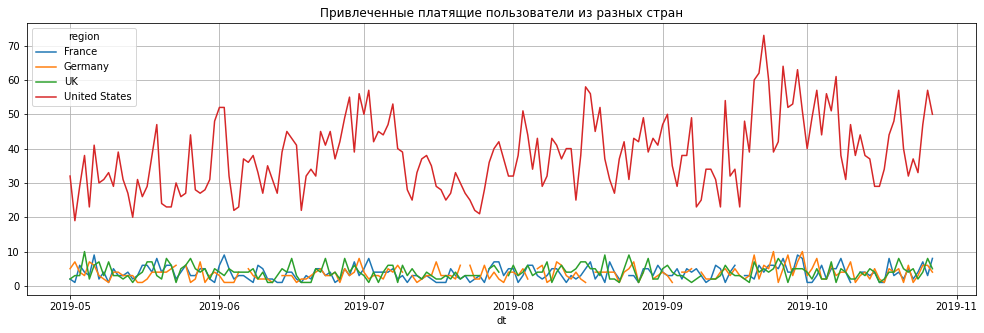

In [36]:
profiles[profiles.payer == True].pivot_table(
    index='dt', 
    columns='region', 
    values='user_id', 
    aggfunc='nunique').plot(figsize=(17, 5), grid=True)
plt.title('Привлеченные платящие пользователи из разных стран')
plt.show()

Большая часть платящих пользователей приходит из *United States*(США). Добля платящих пользователей в США - 6,9 %.

Доля платящих пользователей из Великобритании, Франции, Германии примерно около 4%.

Из Германии приходит меньше всего пользователей. 

**Устройства, которые используют пользователи:**

In [37]:
(profiles.groupby('device')
 .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
 .sort_values(by='device', ascending=False)
 .rename(columns={'nunique': 'all_user', 'sum': 'paying_user', 'mean': '% paying'})
 .style.format({
     'all_user': '{:.0f}'.format, 
     'paying_user': '{:.0f}'.format, 
     '% paying': '{:.2%}'.format}))

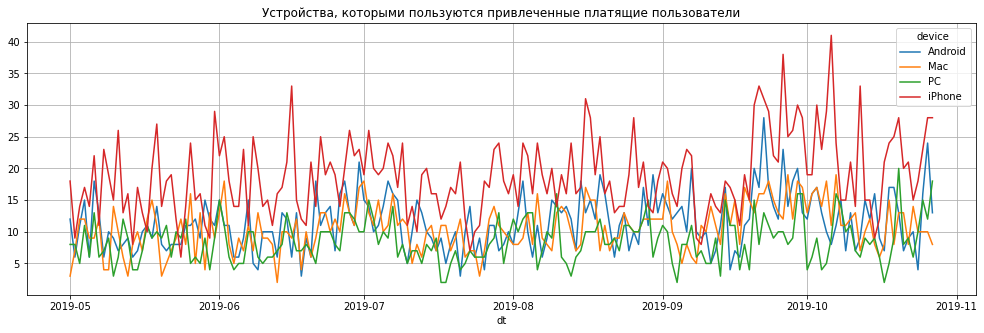

In [38]:
profiles[profiles.payer == True].pivot_table(
    index='dt', 
    columns='device', 
    values='user_id', 
    aggfunc='nunique').plot(figsize=(17, 5), grid=True)
plt.title('Устройства, которыми пользуются привлеченные платящие пользователи')
plt.show()

Большая часть пользователей используют iPhone, доля платящих пользователей - 6,2%.

Доля платящих пользователей на Android, Mac, iPhone близки и примерно составляет 6%

Меньше всего платящих пользователей, которые пользуются PC, доля платящих пользователей 5%.

**Рекламные каналы:**

In [39]:
(profiles.groupby('channel')
 .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
 .sort_values(by='channel', ascending=False)
 .rename(columns={'nunique': 'all_user', 'sum': 'paying_user', 'mean': '% paying'})
 .style.format({
     'all_user': '{:.0f}'.format, 
     'paying_user': '{:.0f}'.format, 
     '% paying': '{:.2%}'.format}))

По количеству привлеченных платящих пользователей, в топ 3 вышли три рекламных канала:
* FaceBoom
* TipTop
* organic

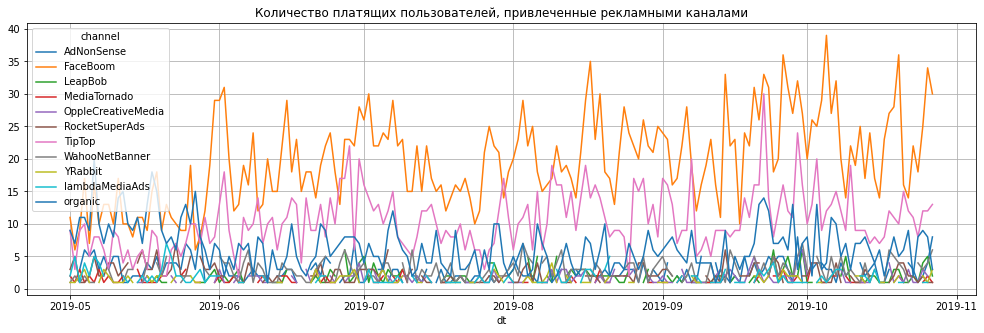

In [40]:
profiles[profiles.payer == True].pivot_table(
    index='dt', 
    columns='channel', 
    values='user_id', 
    aggfunc='nunique').plot(figsize=(17, 5), grid=True)
plt.title('Количество платящих пользователей, привлеченные рекламными каналами')
plt.show()

**Выводы:**
* Большая часть платящих пользователей приходит из United States(США). Добля платящих пользователей в США - 6,9 %.
* Доля платящих пользователей из Великобритании, Франции, Германии примерно около 4%.
* Из Германии приходит меньше всего пользователей.
* Большая часть пользователей используют iPhone, доля платящих пользователей - 6,2%.
* Доля платящих пользователей на Android, Mac, iPhone близки и примерно составляет 6%
* Меньше всего платящих пользователей, которые пользуются PC, доля платящих пользователей 5%.
* Каналы, которые больше остальных приводят платящих пользователей: FaceBoom, TipTop, organic.
* Самая большая доля платящих пользователей из каналов: FaceBoom - 12,2%, AdNonSense - 11%, lambdaMediaAds - 10%.
* Канал organic (пользователи самостоятельно находят сайт) приводит много пользователей, но доля неплатящих пользователей велика, по сравнению с платящими.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

**Общую сумму расходов на маркетинг**

In [41]:
print('Для рекламмы приложения Procrastinate Pro+ потратили ', round(costs_info['costs'].sum(), 2), 'долларов.')

Для рекламмы приложения Procrastinate Pro+ потратили  105497.3 долларов.


**Затраты на рекламные источники.**

In [42]:
costs_info.groupby('channel')['costs'].sum().reset_index().sort_values(by='costs', ascending=False)

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


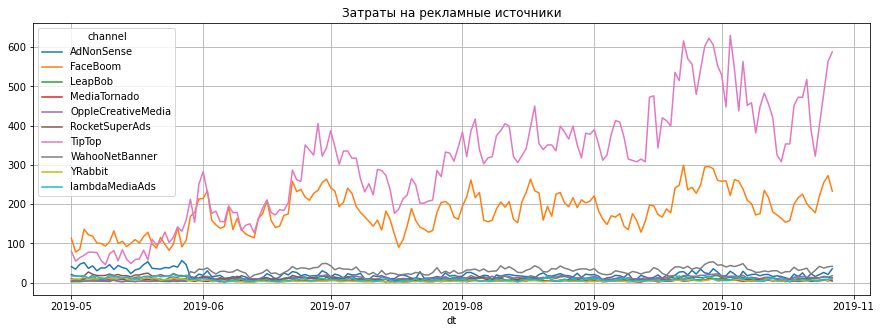

In [43]:
costs_info.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs', 
    aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('Затраты на рекламные источники')
plt.show()

**Динамика маркетинговых затрат по месяцам**

In [44]:
# в таблицу costs_info добавлю колонку с номером месяца
costs_info['month'] = costs_info['dt'].astype('datetime64[M]')

In [45]:
costs_info.head()

,dt,channel,costs,month
0,2019-05-01,FaceBoom,113.3,2019-05-01
1,2019-05-02,FaceBoom,78.1,2019-05-01
2,2019-05-03,FaceBoom,85.8,2019-05-01
3,2019-05-04,FaceBoom,136.4,2019-05-01
4,2019-05-05,FaceBoom,122.1,2019-05-01


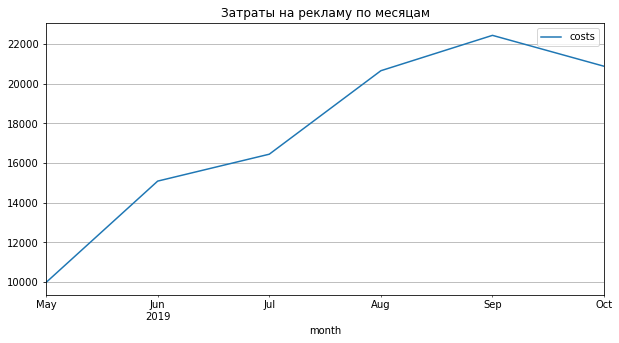

In [46]:
costs_info.pivot_table(
    index='month', 
    values='costs', 
    aggfunc='sum').plot(figsize=(10, 5), grid=True)
plt.title('Затраты на рекламу по месяцам')
plt.show()

В сентябре пик на затраты по рекламе.

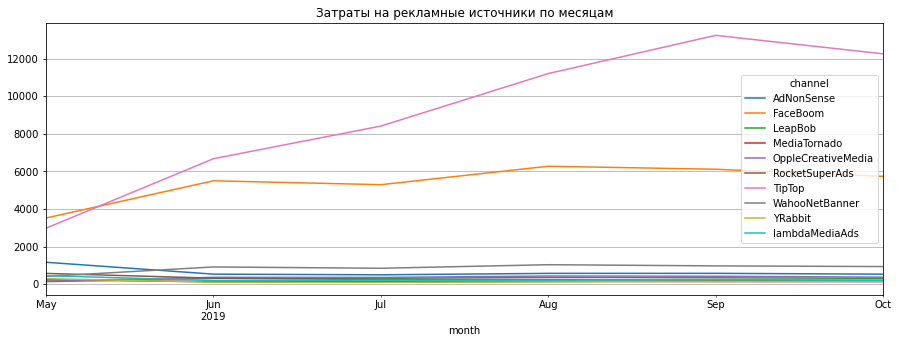

In [47]:
costs_info.pivot_table(
    index='month', 
    columns='channel', 
    values='costs', 
    aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('Затраты на рекламные источники по месяцам')
plt.show()

В начале рекламной компании затраты на рекламу были не большие и больше денег уходило на источник FaceBoom.

Примерно с июня 2019 года затраты на рекламу увеличились и увеличение произошло в двух источниках: TipTop, FaceBoom.

В затратах на рекламу лидируют источники TipTop, FaceBoom.

Затраты в других рекламныхисточниках остались прежними.

**Средний CAC на одного пользователя для всего проекта и для каждого источника трафика.**

Средний CAC на одного пользователя для всего проекта. CAC = Расходы на рекламу / Размер когорты.

In [48]:
print('Средний показатель САС -', round(profiles['acquisition_cost'].mean(), 3))

Средний показатель САС - 0.703


Средний CAC на одного пользователя для каждого источника трафика.

In [49]:
cac_for_channel = (profiles.groupby('channel')
                   .agg({'user_id': 'nunique', 'acquisition_cost': 'sum'}).
                   sort_values(by='acquisition_cost', ascending=False))
cac_for_channel['cac'] = cac_for_channel['acquisition_cost'] / cac_for_channel['user_id']
cac_for_channel

,user_id,acquisition_cost,cac
channel,,,
TipTop,19561,54751.30,2.799003
FaceBoom,29144,32445.60,1.113286
WahooNetBanner,8553,5151.00,0.602245
AdNonSense,3880,3911.25,1.008054
OppleCreativeMedia,8605,2151.25,0.250000
RocketSuperAds,4448,1833.00,0.412095
LeapBob,8553,1797.60,0.210172
lambdaMediaAds,2149,1557.60,0.724802
MediaTornado,4364,954.48,0.218717


Самый дорогой клиент из источника TipTop, в среднем стоимость клиента - 2,8 долларов.

Стоимость клиента из источников FaceBoom, AdNonSense около 1го доллара.

Во всех остальных источниках стоимость клиента не превышает 1го доллара.

**Выводы:**
* Самый дорогой клиент из источника TipTop, в среднем стоимость клиента - 2,8 долларов.
* Стоимость клиента из источников FaceBoom, AdNonSense около 1го доллара.
* Доля платящих клиентов пришедших с FaceBoom, AdNonSense выше, чем в TipTop. То есть клиенты из источников FaceBoom, AdNonSense дешевле и доля платящих клиентов там больше.
* В первые дни рекламной компании расходы на рекламу были не высокие. Но с июня 2019 пошёл рост застрат на рекламу в источниках TipTop, FaceBoom. Затраты на рекламу в других источниках остались примерно на том же уровне.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Установлю момент и горизонт анализа данных:

Я смотрю на данные 1 ноября 2019.

Последняя дата привлечения клиентов 27 октября 2019.

Клиент должен прожить 14 дней.

In [50]:
# момент анализа
observation_date = datetime(2019, 10, 14).date()
# горизонт анализа
horizon_days = 14   

Удалю пользователей, которые пришли в приложение из *organic*. Компания не платила за их привлечение, значит они не требуются в анализе рекламы.

In [51]:
profiles = profiles.query('channel != "organic"')

### Проанализируйте общую окупаемость рекламы

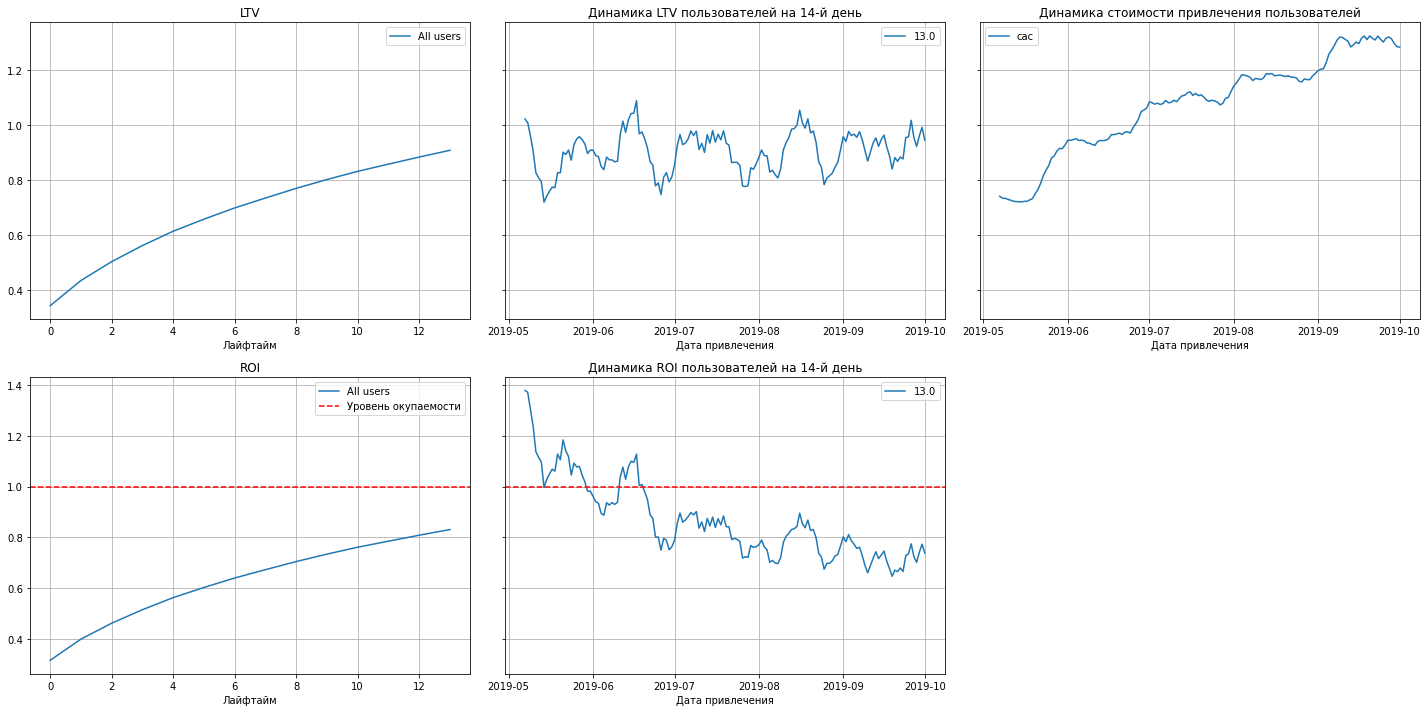

In [52]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_info, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
 - LTV плавно растет, это хорошо.
 - CAC (стоимость привлечения пользователя) растет, это плохо.
 - реклама не окупается, на 14 день ROI достигает примерно 83%.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

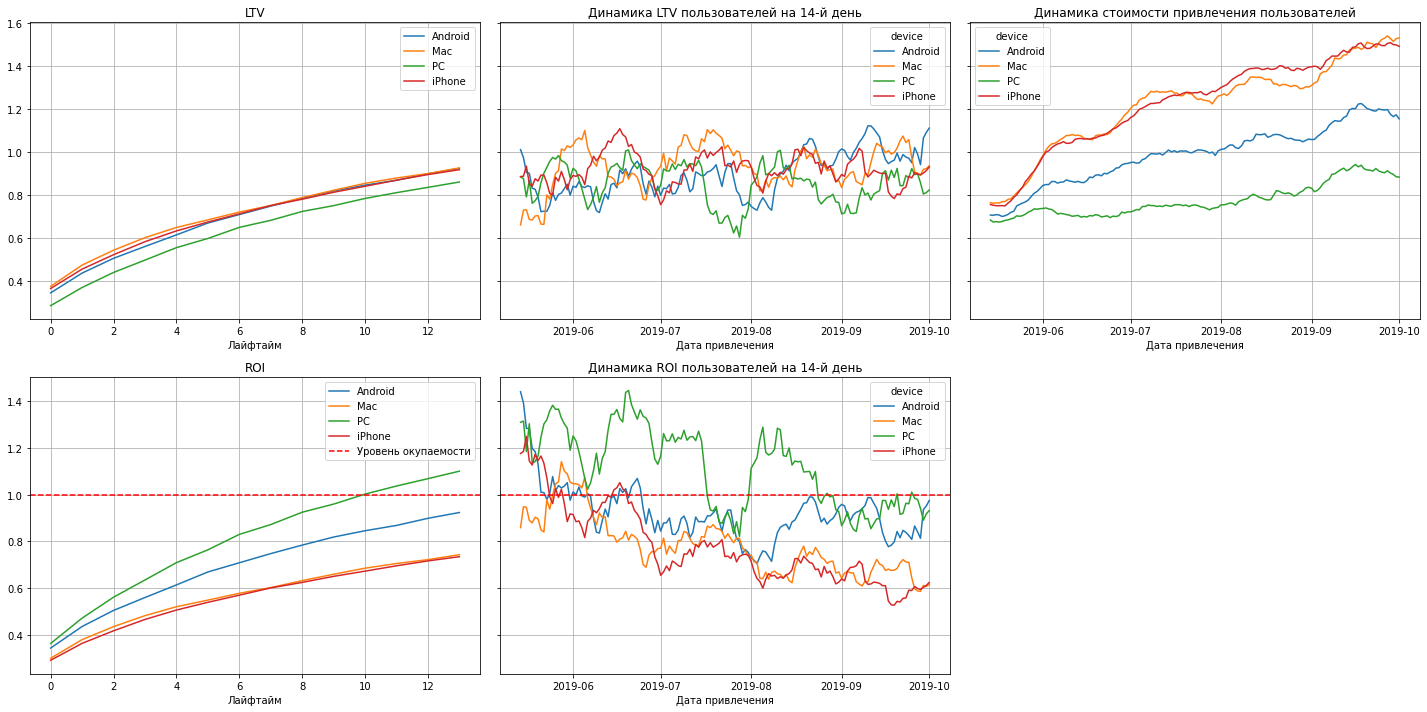

In [53]:
# смотрою окупаемость с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_info, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

По графикам видно:
- стоимость привлечения пользователей на всех устройствах растет.
- стоимость привлечения пользователей на iPhon и Mac самая высокая.
- пользователи на устройствах iPhon, Mac и Android не окупаются. 
- на 14 день ROI у Android достигает примерно 90%.
- на 14 день ROI у iPhon, Ma достигает примерно 75%.
- пользователи устройств PC окупаются на 6-7 день.

### Проанализируйте окупаемость рекламы с разбивкой по странам

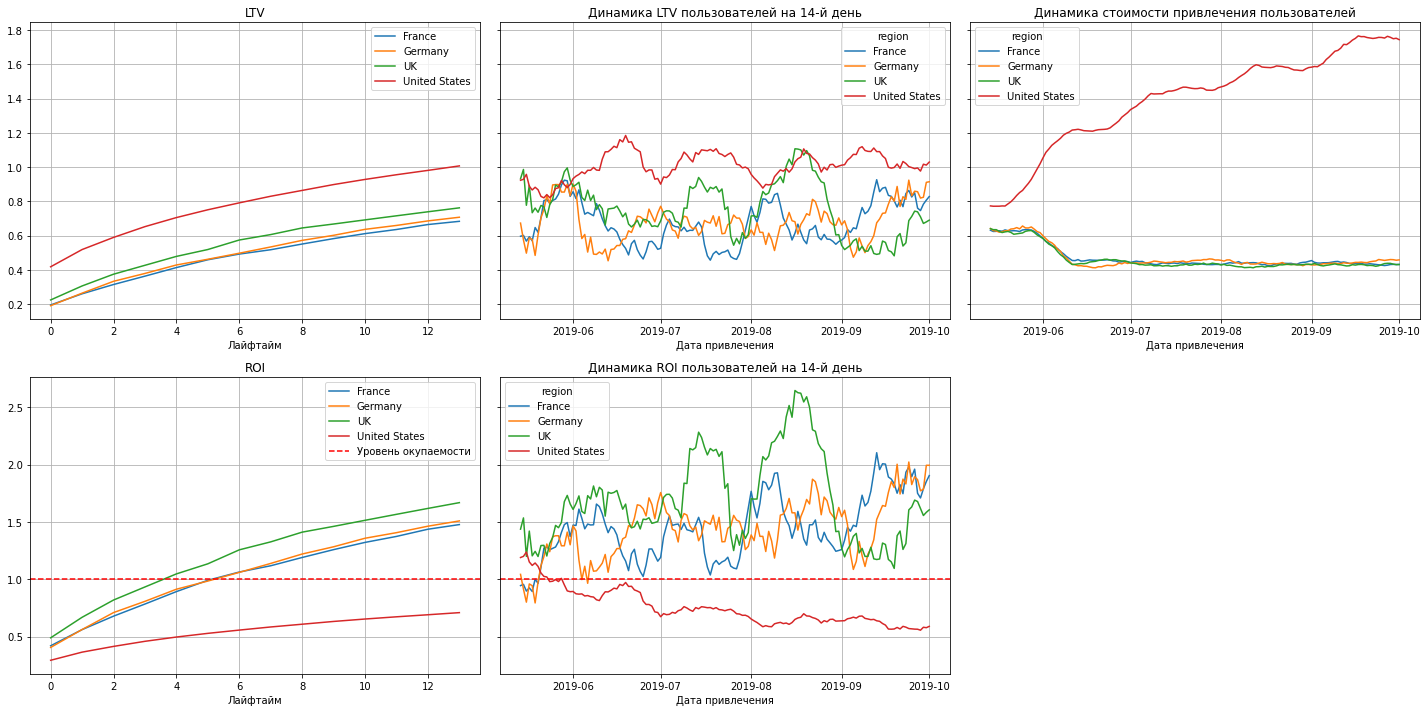

In [54]:
# смотрою окупаемость с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_info, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

По графикам можно сделать такие выводы:
- стоимость клиентов из стран Франция, Германия, Великобритания с конца мая снизилась.
- стоимость клиента из США растет.
- клиенты из США не окупаются. Хотя из США наибольший поток клиентов и там наибольший процент платящих пользователей.
- клиенты из других стран окупаются на 3-5 день.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

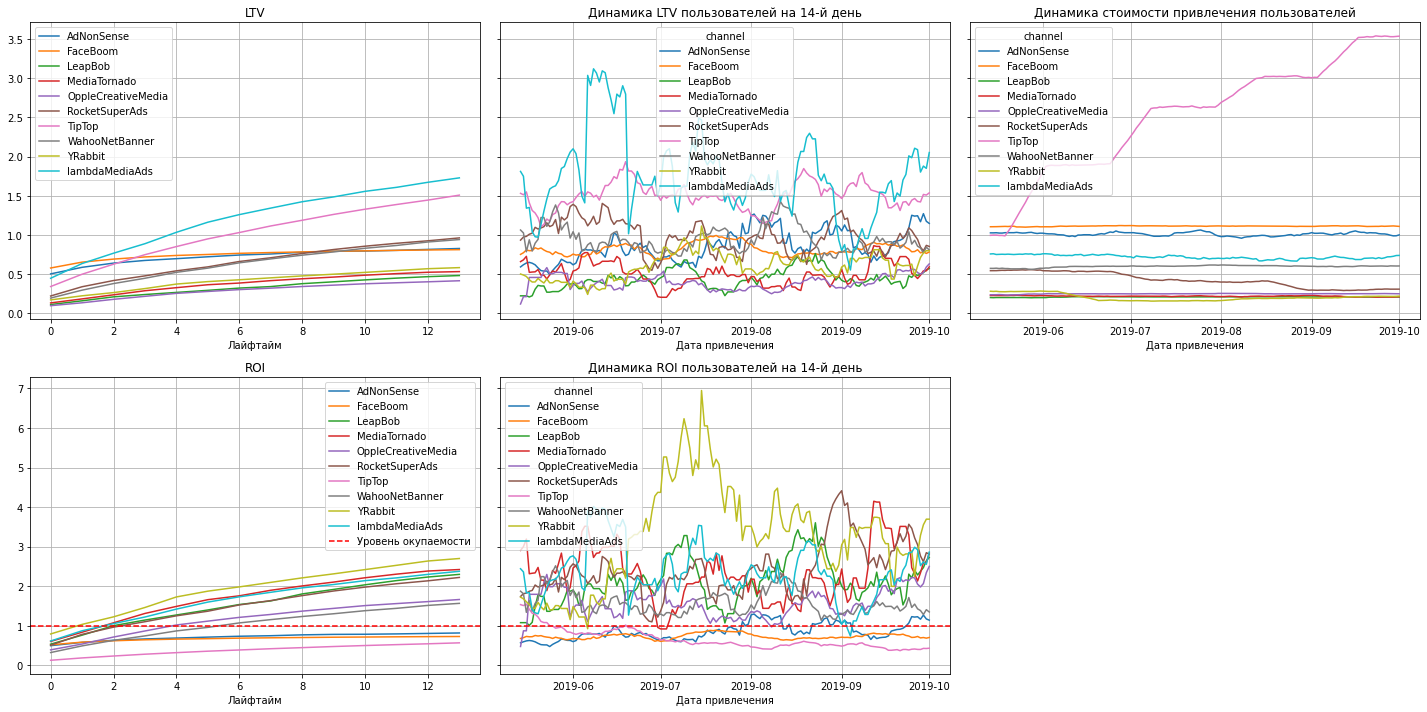

In [55]:
# смотрою окупаемость с разбивкой по источникам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_info, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Вот что говорят графики:
- реклама в источнике TipTop с каждым месяцам дорожает. Это плохо.
- LTV у рекламного канала TipTop почти самое высокое.
- стоимость рекламы в других источниках остается примерно на том же уровне. Это хорошо.
- реклама в источниках TipTop, FaceBoom, AdNonSense не окупается. В этих источниках самая дорогая стоимость клиента.
- в других источниках реклама окупается уже на 2-5 день.
- быстрее всех окупается реклама в YRabbit, здесь самая дешовая стоимость клиента, но конверсия маленькая.

**Выводы:**
- CAC (стоимость привлечения пользователя) растет, это плохо.
- реклама не окупается, на 14 день ROI достигает примерно 83%
- стоимость привлечения пользователей на всех устройствах растет.
- стоимость привлечения пользователей на iPhon и Mac самая высокая.
- пользователи на устройствах iPhon, Mac и Android не окупаются. 
- на 14 день ROI у Android достигает примерно 90%.
- на 14 день ROI у iPhon, Ma достигает примерно 75%.
- стоимость клиента из США растет.
- клиенты из США не окупаются. Хотя из США наибольший поток клиентов и там наибольший процент платящих пользователей.
- реклама в источнике TipTop с каждым месяцам дорожает. Это плохо.
- реклама в источниках TipTop, FaceBoom, AdNonSense не окупается. В этих источниках самая дорогая стоимость клиента.

**То есть проблемные устройства iPhon, Mac и Android, клиенты не окупаются из США, рекламные источники TipTop, FaceBoom, AdNonSense убыточные.**

### Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

**Конверсия пользователей с разбивкой по устройствам.**

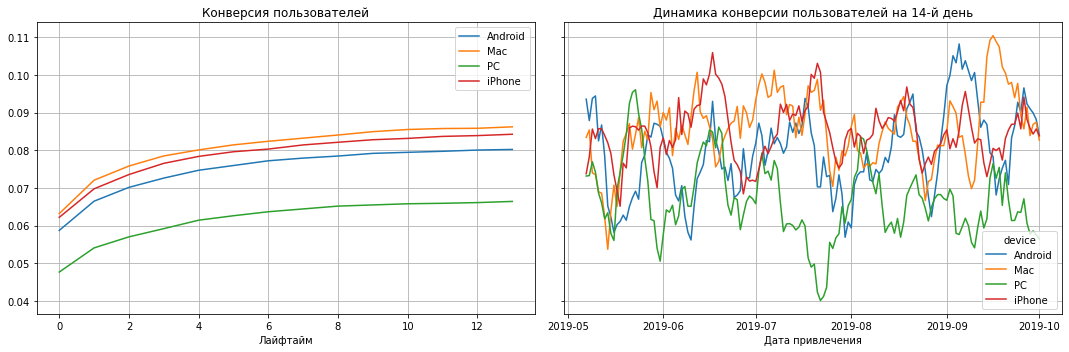

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_info, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи Android, Mac и iPhon конвертируются хорошо.

Ползователи на PC конвертируются хуже.

**Удержание пользователей с разбивкой по устройствам.**

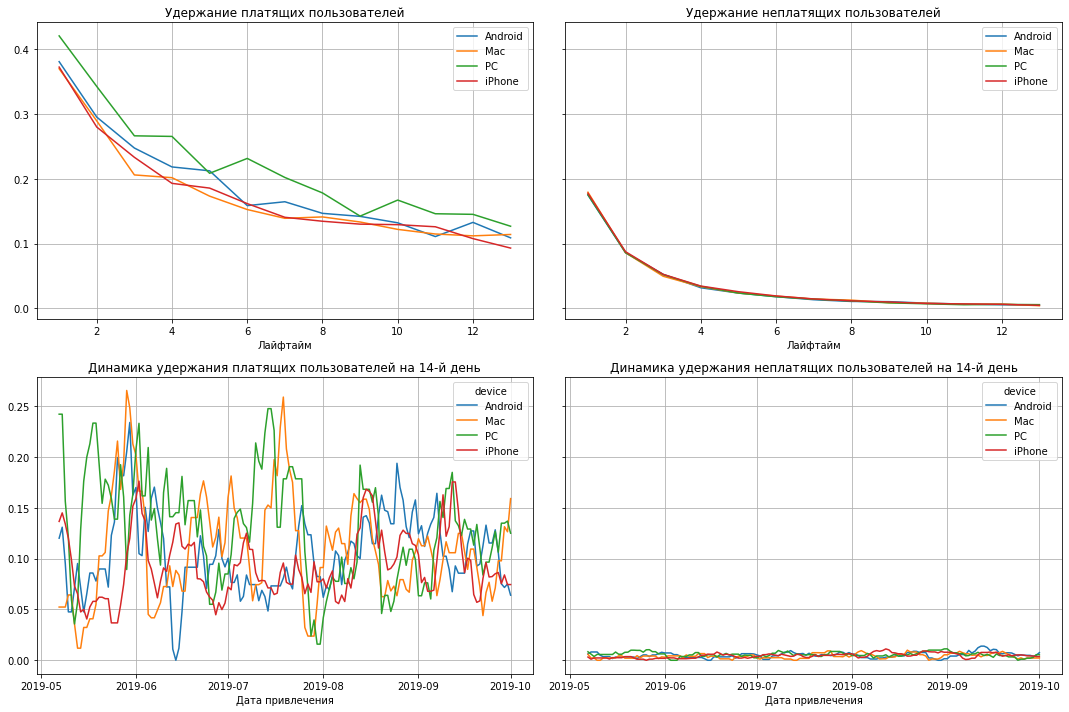

In [57]:
retention_raw, retention_grouped, retention_history = (get_retention(profiles, visits_info, observation_date, 
                                                                     horizon_days, dimensions=['device']))

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержания на всех устройствах примерно близки.

**Конверсия пользователей с разбивкой по странам.**

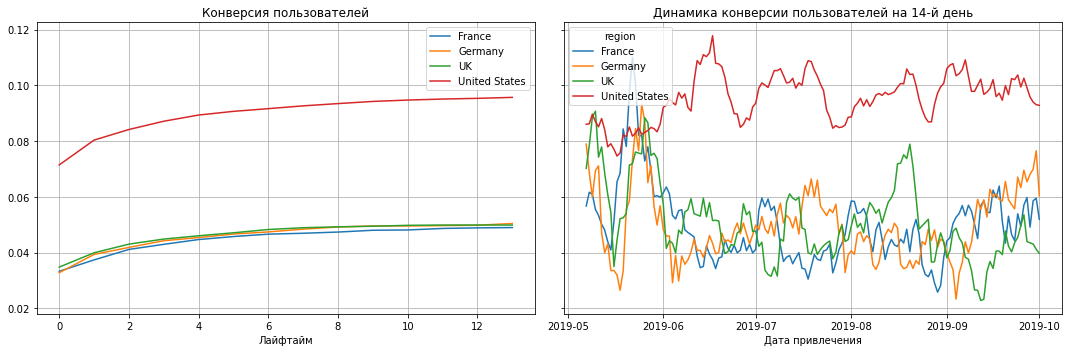

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_info, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США лучше чем в других странах.

**Удержание пользователей с разбивкой по странам.**

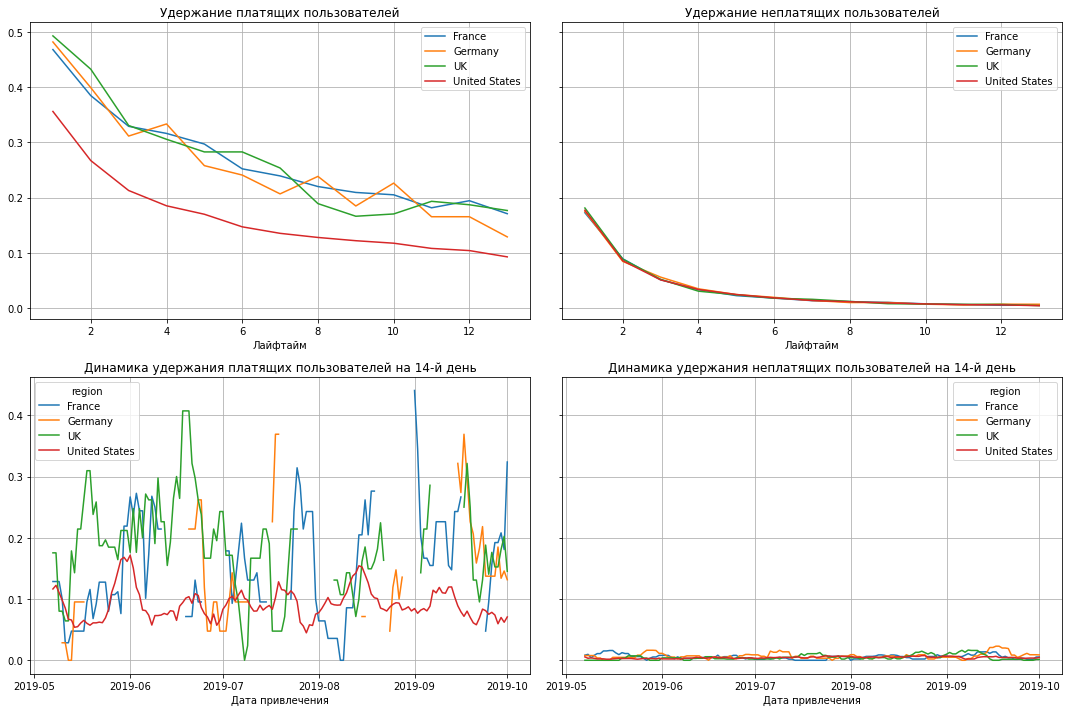

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits_info, observation_date, 
                                                                    horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США хуже удерживаются.

**Конверсия пользователей с разбивкой по рекламным каналам.**

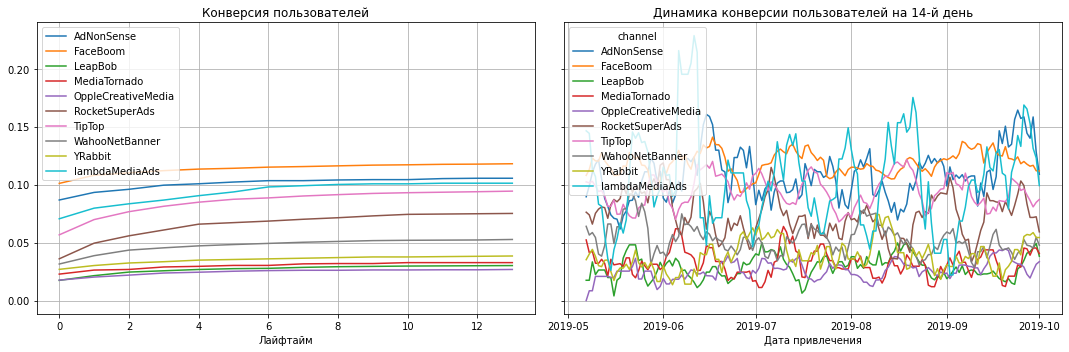

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_info, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у рекламных каналов TipTop, FaceBoom, AdNonSense хорошие.

Конверсия клиентов из рекламных каналов: OppleCreativeMedia, LeapBob, MediaTornado, YRabbit очень низкое.

**Удержание пользователей с разбивкой по рекламным каналам.**

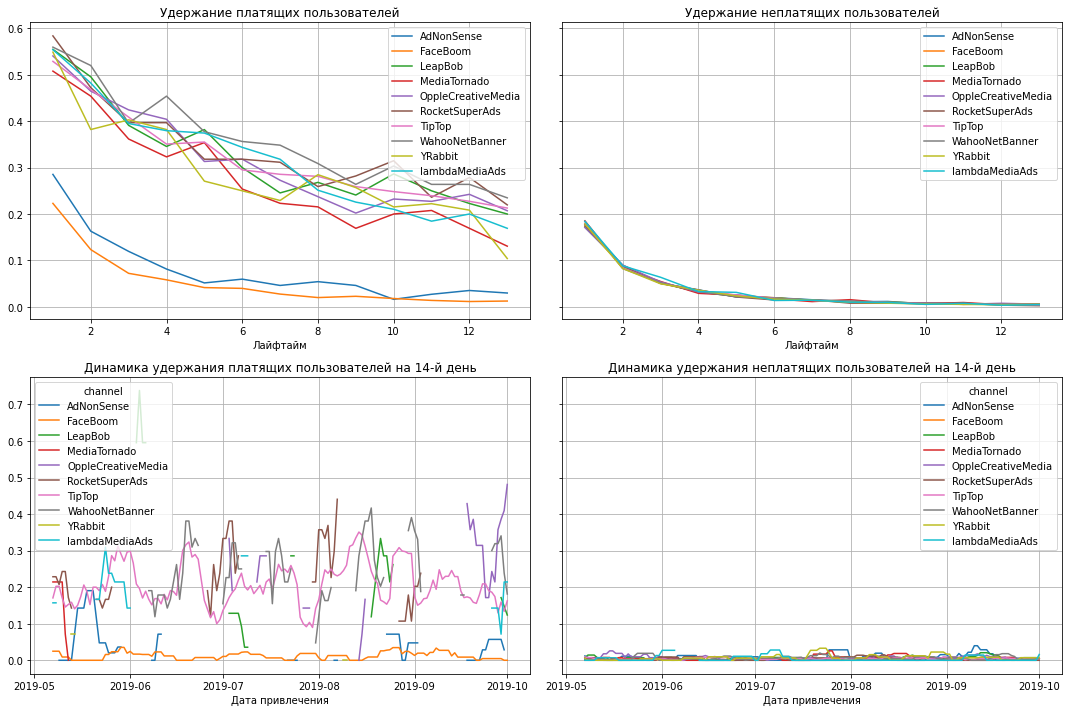

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits_info, observation_date, 
                                                                    horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользоветелей из рекламных источников: AdNonSense, FaceBoom стремительно снижается и к 14 дню почти достигает 0.

**Выводы:**
- пользователи из США удерживаюся хуже всех.
- рекламные каналы TipTop, FaceBoom, AdNonSense не окупаются, возможно из-за высокой стоимости клиета.
- стоимость клиента в рекламном канале TipTop растет с каждым месяцем.
- клиненты из рекламных источников AdNonSense, FaceBoom очень плохо удерживаются.

**Посмотрю как распределены пользователи из США по источникам**

In [62]:
user_usa = profiles
user_usa['usa'] = user_usa['region'].isin(['United States'])

user_usa.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,usa
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,True
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,True
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,False
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,True
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000,False


In [63]:
user_usa.groupby('channel').agg({'user_id': 'count', 'usa': 'sum'}).reset_index().sort_values('usa', ascending=False)

,channel,user_id,usa
1,FaceBoom,29144,29144
6,TipTop,19561,19561
5,RocketSuperAds,4448,4448
3,MediaTornado,4364,4364
8,YRabbit,4312,4312
0,AdNonSense,3880,0
2,LeapBob,8553,0
4,OppleCreativeMedia,8605,0
7,WahooNetBanner,8553,0
9,lambdaMediaAds,2149,0


В рекламных источниках  FaceBoom, TipTop все пользователи из США.

In [64]:
user_usa = user_usa.query('region == "United States"')

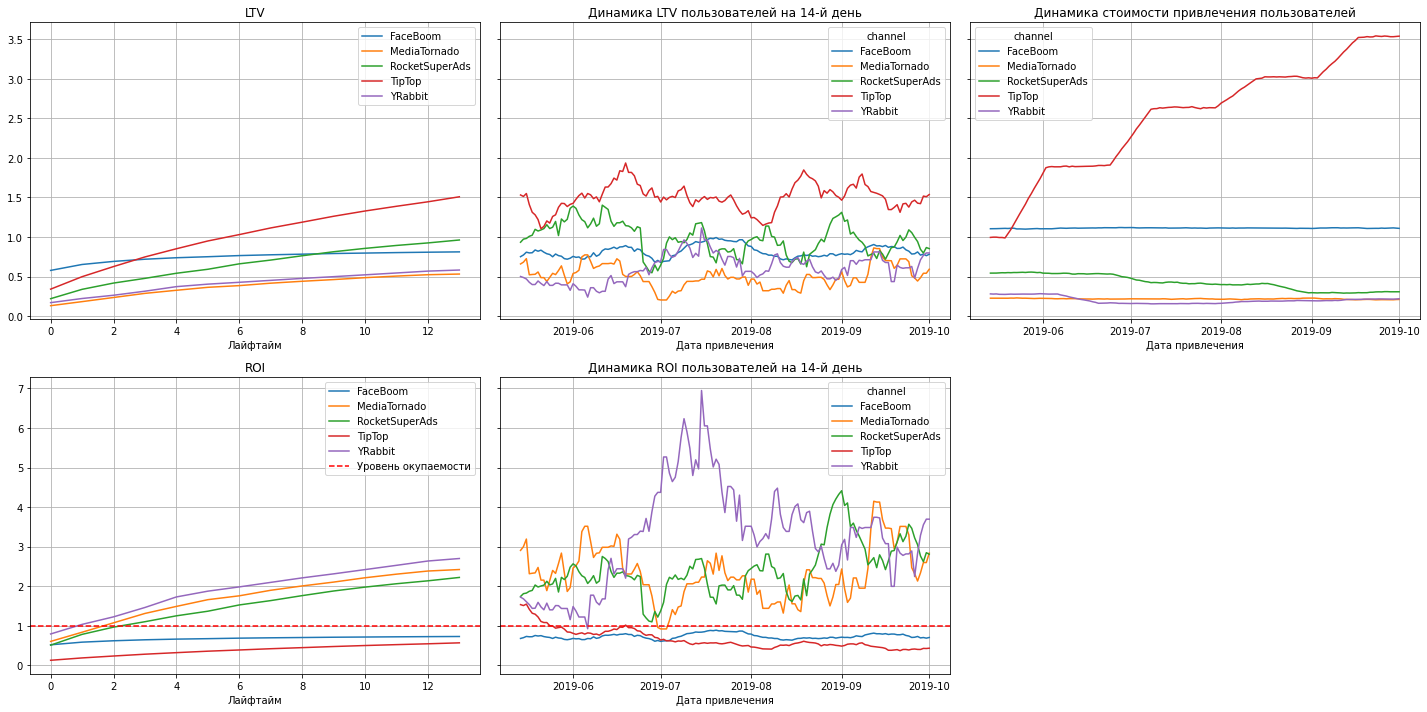

In [65]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    user_usa, orders_info, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Пользователи из США, привлеченные каналами  FaceBoom, TipTop не окупаются.

Стоимость клиента в FaceBoom постоянно растет.

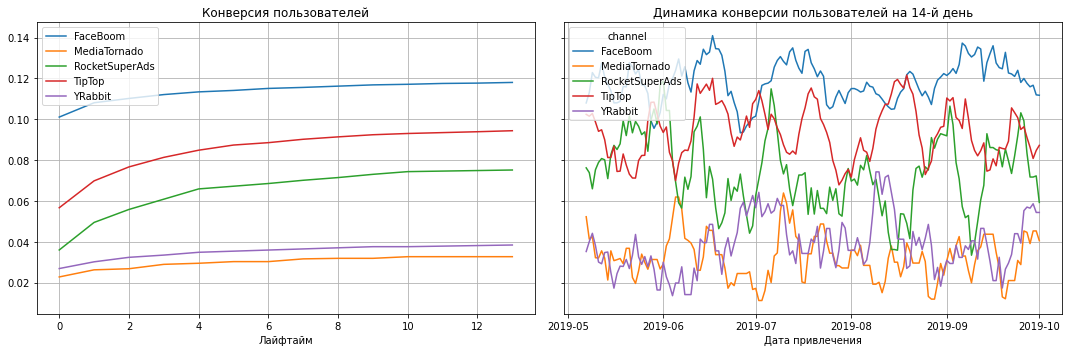

In [66]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    user_usa, orders_info, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия в рекламных источниках FaceBoom, TipTop нормальная.

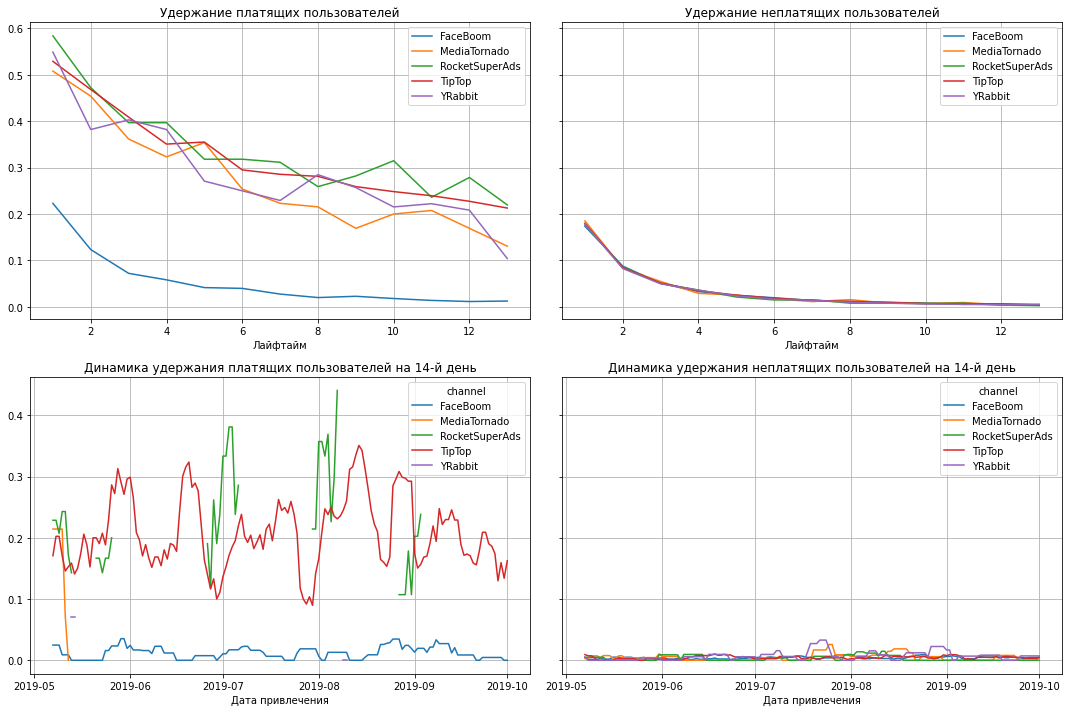

In [67]:
retention_raw, retention_grouped, retention_history = get_retention(user_usa, visits_info, observation_date, 
                                                                    horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Клиенты из США, привлеченые FaceBoom плохо удерживаются.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Рекламная компания была неэффективной, потому что:
- Примерно с конца мая 2019 пошёл рост застрат на рекламу в источниках TipTop, FaceBoom. Затраты на рекламу в других источниках остались примерно на том же уровне. Эти источники затрачивали много средств, но не были эффективными.
- В процессе анализа я выделила три самых дорогих источника, по стоимости клиента: TipTop - 2,8 доллара, FaceBoom - 1,11 долларов, AdNonSense - 1 доллар.
- Удержание пользоветелей из рекламных источников: AdNonSense, FaceBoom стремительно снижается и к 14 дню почти достигает 0.
- Клиенты из США очень плохо удерживаюся, но конверсия у них хорошая.
- Пользователи, привлеченные TipTop, FaceBoom, все из США. Эти клиенты не окупаются
- Клиенты из США, привлеченные TipTop не окупаются, потому что в рекламном источнике высокая цена за клиента.
- Клиенты из США, привлеченные FaceBoom не окупаются, потому что в рекламном источнике высокая цена за клиента и низкий показатель удержания клиента.

Рекомендации: Не использовать рекламные источники : 
- TipTop (самый дорогой и неэффективный, реклама не окупается).
- AdNonSense (дает низкуое удержание, реклама не окупается).
- FaceBoom (низкое удержание клиентов, реклама не окупается)

Рекомендую обратить внимание на рекламный источник **lambdaMediaAds**, конверсия, удержание клиентов хорошие и стоимость клиента меньше доллара, 0.7.